# Importing required libraries

In [ ]:
# pip install -r requirements.txt
!pip install yfinance


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Data from yahoo finance

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('ASIANPAINT.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS
0,2012-01-02,233.256409,235.746303,230.527896,230.527896,182450
1,2012-01-03,238.839523,239.532898,234.143421,234.147901,174850
2,2012-01-04,240.879059,243.125800,235.845271,235.845271,341860
3,2012-01-05,240.586533,242.319984,239.532936,240.784644,719580
4,2012-01-06,239.586868,241.779582,238.191105,238.456737,3815540


In [ ]:
df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)

<ipython-input-6-b762d74b983a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)


In [ ]:
df.head()

Price,Close
Ticker,ASIANPAINT.NS
0,233.256409
1,238.839523
2,240.879059
3,240.586533
4,239.586868


# Plotting Closing Price

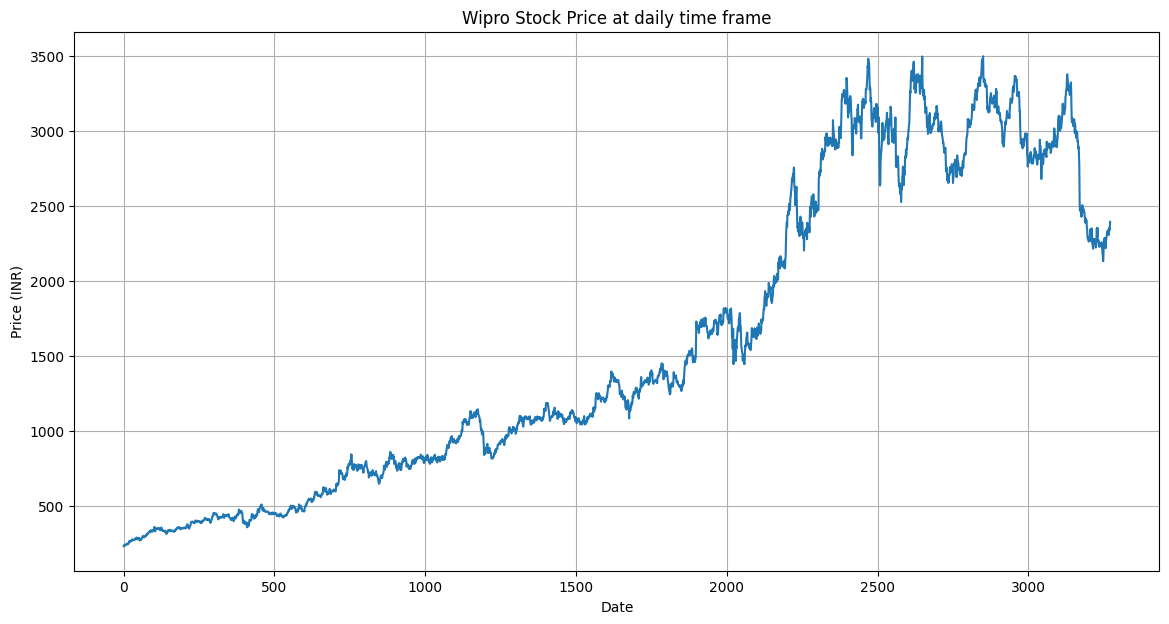

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title("Wipro Stock Price at daily time frame")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close
Ticker,ASIANPAINT.NS
0,233.256409
1,238.839523
2,240.879059
3,240.586533
4,239.586868
...,...
3267,2306.649902
3268,2349.399902
3269,2356.050049


In [ ]:
df.shape

(3272, 1)

# Dataset Spliting for training (70%) and testing (30%)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS
0,2012-01-02,233.256409,235.746303,230.527896,230.527896,182450
1,2012-01-03,238.839523,239.532898,234.143421,234.147901,174850
2,2012-01-04,240.879059,243.125800,235.845271,235.845271,341860
3,2012-01-05,240.586533,242.319984,239.532936,240.784644,719580
4,2012-01-06,239.586868,241.779582,238.191105,238.456737,3815540
...,...,...,...,...,...,...
3267,2025-04-02,2306.649902,2328.399902,2292.149902,2328.000000,792693
3268,2025-04-03,2349.399902,2354.899902,2289.800049,2295.000000,608846
3269,2025-04-04,2356.050049,2363.949951,2302.800049,2349.399902,1163188


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
print(data.shape)
print(train.shape)
print(test.shape)

(3272, 6)
(2290, 6)
(982, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS
0,2012-01-02,233.256409,235.746303,230.527896,230.527896,182450
1,2012-01-03,238.839523,239.532898,234.143421,234.147901,174850
2,2012-01-04,240.879059,243.125800,235.845271,235.845271,341860
3,2012-01-05,240.586533,242.319984,239.532936,240.784644,719580
4,2012-01-06,239.586868,241.779582,238.191105,238.456737,3815540


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS
2290,2021-04-22,2429.659424,2473.923005,2407.164817,2472.616772,1690758
2291,2021-04-23,2436.141357,2481.662743,2415.098018,2444.994214,1614593
2292,2021-04-26,2474.793213,2491.337725,2447.799784,2447.799784,1103980
2293,2021-04-27,2490.708984,2496.078475,2451.669869,2462.312477,866331
2294,2021-04-28,2529.603027,2535.117786,2491.337964,2503.915593,1065561


# Dataset normalization by using MinMax scaler
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
test

Price,Date,Close,High,Low,Open,Volume
Ticker,,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS,ASIANPAINT.NS
2290,2021-04-22,2429.659424,2473.923005,2407.164817,2472.616772,1690758
2291,2021-04-23,2436.141357,2481.662743,2415.098018,2444.994214,1614593
2292,2021-04-26,2474.793213,2491.337725,2447.799784,2447.799784,1103980
2293,2021-04-27,2490.708984,2496.078475,2451.669869,2462.312477,866331
2294,2021-04-28,2529.603027,2535.117786,2491.337964,2503.915593,1065561
...,...,...,...,...,...,...
3267,2025-04-02,2306.649902,2328.399902,2292.149902,2328.000000,792693
3268,2025-04-03,2349.399902,2354.899902,2289.800049,2295.000000,608846
3269,2025-04-04,2356.050049,2363.949951,2302.800049,2349.399902,1163188


In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.        ],
       [0.00143282],
       [0.00210465],
       ...,
       [0.89966824],
       [0.92356381],
       [0.90441651]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2190, 100, 1)

#  LSTM Model

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM layer with more units and higher dropout rate
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Higher dropout for better regularization

# Second LSTM layer with more units and higher dropout rate
model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Slightly higher dropout rate

# Third LSTM layer with more units and dropout
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Dropout increased further to prevent overfitting

# Fourth LSTM layer with more units
model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.5))  # Same dropout rate for the last layer

# Output layer
model.add(Dense(units=1))  # Prediction of stock price (regression problem)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 150)            │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 200)            │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 250)                 │         451,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#  Model Training

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs =5)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 0.0316 - mean_absolute_error: 0.1203
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0037 - mean_absolute_error: 0.0419
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0036 - mean_absolute_error: 0.0415
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0040 - mean_absolute_error: 0.0445
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0032 - mean_absolute_error: 0.0393


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(982, 1)

In [ ]:
past_80_days = pd.DataFrame(train_close[-80:])

In [ ]:
test_df = pd.DataFrame(test_close)

# Defining the final test dataset by including the last 100 rows of the training dataset to predict the first column of the testing dataset.

---


In [ ]:
# final_df = past_80_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_80_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2458.442665
1,2519.396046
2,2571.641229
3,2568.013133
4,2597.764487


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.23831836],
       [0.28281717],
       [0.32095859],
       ...,
       [0.15871206],
       [0.0423427 ],
       [0.16353044]])

In [ ]:
input_data.shape

(1062, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 80, 1)
(982,)


# Prediction of Closing Price and plotting the Graph

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step


In [ ]:
y_pred.shape

(982, 1)

In [ ]:
y_test

array([0.24866612, 0.22850037, 0.23054856, 0.24114351, 0.27151572,
       0.30118139, 0.27646016, 0.2164224 , 0.28352339, 0.29199931,
       0.26575927, 0.24820697, 0.27222198, 0.2326678 , 0.26374626,
       0.2941182 , 0.40854303, 0.41913843, 0.42489461, 0.43114577,
       0.42620152, 0.45374811, 0.44732067, 0.52003699, 0.52720621,
       0.53296286, 0.51873014, 0.53780094, 0.50520417, 0.50573391,
       0.52932541, 0.51307957, 0.51166698, 0.51364479, 0.53397213,
       0.5446195 , 0.54114152, 0.55171774, 0.59359747, 0.58575388,
       0.61670221, 0.59018994, 0.63334755, 0.5943073 , 0.56403328,
       0.59444882, 0.59004831, 0.5652046 , 0.57230275, 0.578691  ,
       0.59640117, 0.58720897, 0.57514204, 0.61915115, 0.60850364,
       0.58862852, 0.59778504, 0.58720897, 0.57514196, 0.58011073,
       0.56875332, 0.56541737, 0.57017299, 0.66528956, 0.64825367,
       0.62976298, 0.62937252, 0.59455589, 0.57592274, 0.57869098,
       0.56279099, 0.58720901, 0.60183126, 0.59714625, 0.56946

In [ ]:
y_pred

array([[0.20044099],
       [0.20718563],
       [0.21330377],
       [0.2186012 ],
       [0.22298358],
       [0.22650898],
       [0.22937685],
       [0.23175706],
       [0.2336401 ],
       [0.23512544],
       [0.23636359],
       [0.23743536],
       [0.23833956],
       [0.23910557],
       [0.23967485],
       [0.2400486 ],
       [0.24032961],
       [0.2409163 ],
       [0.24225989],
       [0.24473307],
       [0.24857749],
       [0.25385642],
       [0.26055643],
       [0.26854303],
       [0.2777818 ],
       [0.28822756],
       [0.29977852],
       [0.31221497],
       [0.32529986],
       [0.33867806],
       [0.3519768 ],
       [0.364926  ],
       [0.3772782 ],
       [0.38883284],
       [0.39945316],
       [0.40911567],
       [0.41788056],
       [0.4258247 ],
       [0.4330526 ],
       [0.4397765 ],
       [0.44617668],
       [0.45246106],
       [0.45871145],
       [0.46504986],
       [0.47144842],
       [0.47772595],
       [0.48375732],
       [0.489

In [ ]:
scaler.scale_

array([0.00073005])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
y_pred

array([[ 477.61575],
       [ 493.68704],
       [ 508.2655 ],
       [ 520.8883 ],
       [ 531.3308 ],
       [ 539.7312 ],
       [ 546.5648 ],
       [ 552.23645],
       [ 556.7234 ],
       [ 560.2627 ],
       [ 563.213  ],
       [ 565.76685],
       [ 567.9214 ],
       [ 569.74664],
       [ 571.10315],
       [ 571.9937 ],
       [ 572.6633 ],
       [ 574.0613 ],
       [ 577.2629 ],
       [ 583.156  ],
       [ 592.3166 ],
       [ 604.8953 ],
       [ 620.8603 ],
       [ 639.891  ],
       [ 661.9054 ],
       [ 686.7958 ],
       [ 714.31964],
       [ 743.95355],
       [ 775.13257],
       [ 807.01044],
       [ 838.69904],
       [ 869.5547 ],
       [ 898.98785],
       [ 926.5205 ],
       [ 951.82684],
       [ 974.85095],
       [ 995.73615],
       [1014.66565],
       [1031.8884 ],
       [1047.9103 ],
       [1063.1608 ],
       [1078.1354 ],
       [1093.0289 ],
       [1108.1323 ],
       [1123.3789 ],
       [1138.3372 ],
       [1152.7089 ],
       [1166.

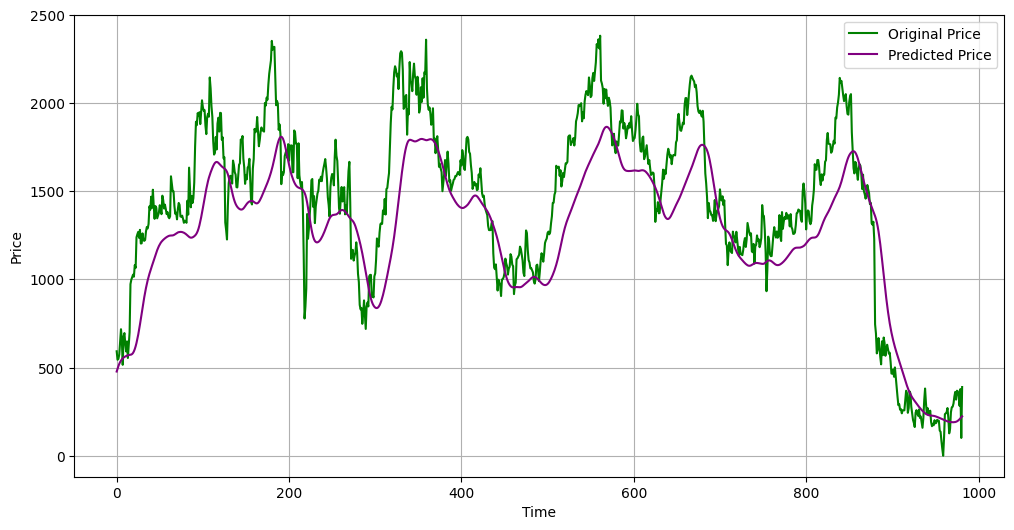

In [ ]:
import matplotlib.pyplot as plt

#  y_test and y_pred are  data arrays
plt.figure(figsize=(12, 6))

# Custom colors: Green for Original Price and Purple for Predicted Price
plt.plot(y_test, 'g', label="Original Price")  # Green
plt.plot(y_pred, '#800080', label="Predicted Price")  # Purple using hex code

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Calculation of mean absolute error and R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 16.19%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.6788937723226046


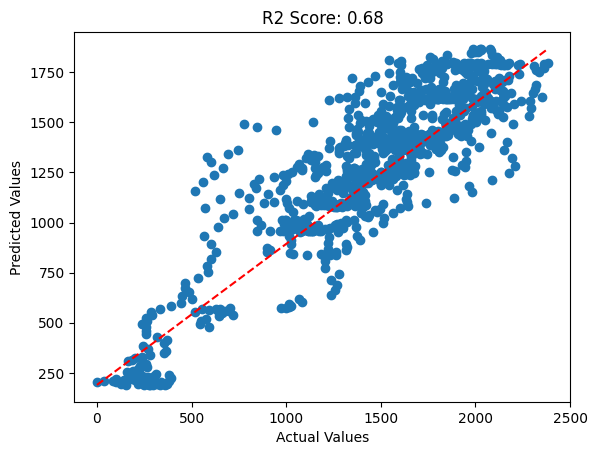

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()